In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5ce26cf5-4779-493d-8d1c-35a3302c17e0',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# if this doesn't work (which was given by coinmarketcap.com) for pulling data, then put this in 
# Anaconda Prompt: "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# And if that also failed to work, use a local host url in Anaconda prompt

{'status': {'timestamp': '2025-01-12T02:25:35.127Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 10591}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11860, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [4]:
import pandas as pd

pd.set_option('display.max_columns', None) # displays all columns
df = pd.json_normalize(data['data']) # puts dict into a table format
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980887e+07,1.980887e+07,False,NaN,1,None,None,None,2025-01-12T02:24:00.000Z,94457.015041,1.851325e+10,-69.0373,0.151337,0.223224,-3.777836,-5.050193,8.101317,50.954117,1.871087e+12,56.4584,1.983597e+12,None,2025-01-12T02:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:25:36.978461
1,1027,Ethereum,ETH,ethereum,9814,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204907e+08,1.204907e+08,True,NaN,2,None,None,None,2025-01-12T02:25:00.000Z,3279.397927,1.143149e+10,-55.2971,0.065381,1.173036,-9.952299,-15.817222,1.801352,33.925846,3.951369e+11,11.9224,3.951369e+11,None,2025-01-12T02:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:25:36.978461
2,52,XRP,XRP,xrp,1500,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.749312e+10,9.998667e+10,False,NaN,3,None,None,None,2025-01-12T02:25:00.000Z,2.535086,8.517734e+09,61.9578,0.938189,8.257293,5.894825,8.393307,269.496688,378.993879,1.457500e+11,4.3979,2.535086e+11,None,2025-01-12T02:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:25:36.978461
3,825,Tether USDt,USDT,tether,112246,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.374514e+11,1.414371e+11,True,NaN,4,None,None,None,2025-01-12T02:25:00.000Z,0.999576,5.697144e+10,-50.6764,-0.007169,-0.036164,-0.027701,-0.067539,-0.145226,-0.002712,1.373930e+11,4.1457,1.413771e+11,None,2025-01-12T02:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-11 18:25:36.978461
4,1839,BNB,BNB,bnb,2330,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440062e+08,1.440062e+08,False,NaN,5,None,None,None,2025-01-12T02:25:00.000Z,696.179877,1.292050e+09,-21.1115,-0.006519,0.804641,-2.123581,-1.485822,13.194153,21.893160,1.002542e+11,3.0251,1.002542e+11,None,2025-01-12T02:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:25:36.978461
5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.842121e+08,5.920022e+08,True,NaN,6,None,None,None,2025-01-12T02:25:00.000Z,187.222135,2.091755e+09,-42.9444,0.171274,0.419798,-13.334343,-17.457382,-9.075737,26.129169,9.065522e+10,2.7353,1.108359e+11,None,2025-01-12T02:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:25:36.978461
6,74,Dogecoin,DOGE,dogecoin,1143,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.475866e+11,1.475866e+11,True,NaN,7,None,None,None,2025-01-12T02:25:00.000Z,0.339246,1.495904e+09,-51.9164,0.402084,1.820322,-13.442331,-16.244508,-11.266998,208.972604,5.006821e+10,1.5108,5.006821e+10,None,2025-01-12T02:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:25:36.978461
7,3408,USDC,USDC,usd-coin,24647,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.573443e+10,4.573443e+10,False,NaN,8,None,None,None,2025-01-12T02:25:00.000Z,1.000046,3.727177e+09,-50.4731,0.004200,0.001273,0.006673,0.007443,0.041641,0.012554,4.573655e+10,1.3801,4.573655e+10,None,2025-01-12T02:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-11 18:25:36.978461
8,2010,Cardano,ADA,cardano,1431,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-con

In [34]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '5ce26cf5-4779-493d-8d1c-35a3302c17e0',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # if this doesn't work (which was given by coinmarketcap.com) for pulling data, then put this in 
    # Anaconda Prompt: "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
    # And if that also failed to work, use a local host url in Anaconda prompt

    df2 = pd.json_normalize(data['data']) # puts dict into a table format
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

    # if not os.path.isfile(r'')
    #     df.to_csv(r'', header='column_names')
    # else:
    #     df.to_csv(r'',mode='a',header=False)


In [28]:
import os
from time import time
from time import sleep

for i in range(100): # max is 333 credits given by coinmarketcap.com
    api_runner()
    print('API Runner Completed')
    sleep(60) # sleep for 1 minute
exit()

API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [36]:
#df43 = pd.read_csv(r'')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980887e+07,1.980887e+07,False,NaN,1,None,None,None,2025-01-12T02:24:00.000Z,94457.015041,1.851325e+10,-69.0373,0.151337,0.223224,-3.777836,-5.050193,8.101317,50.954117,1.871087e+12,56.4584,1.983597e+12,None,2025-01-12T02:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:25:36.978461
1,1027,Ethereum,ETH,ethereum,9814,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204907e+08,1.204907e+08,True,NaN,2,None,None,None,2025-01-12T02:25:00.000Z,3279.397927,1.143149e+10,-55.2971,0.065381,1.173036,-9.952299,-15.817222,1.801352,33.925846,3.951369e+11,11.9224,3.951369e+11,None,2025-01-12T02:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:25:36.978461
2,52,XRP,XRP,xrp,1500,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.749312e+10,9.998667e+10,False,NaN,3,None,None,None,2025-01-12T02:25:00.000Z,2.535086,8.517734e+09,61.9578,0.938189,8.257293,5.894825,8.393307,269.496688,378.993879,1.457500e+11,4.3979,2.535086e+11,None,2025-01-12T02:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:25:36.978461
3,825,Tether USDt,USDT,tether,112246,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.374514e+11,1.414371e+11,True,NaN,4,None,None,None,2025-01-12T02:25:00.000Z,0.999576,5.697144e+10,-50.6764,-0.007169,-0.036164,-0.027701,-0.067539,-0.145226,-0.002712,1.373930e+11,4.1457,1.413771e+11,None,2025-01-12T02:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-11 18:25:36.978461
4,1839,BNB,BNB,bnb,2330,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440062e+08,1.440062e+08,False,NaN,5,None,None,None,2025-01-12T02:25:00.000Z,696.179877,1.292050e+09,-21.1115,-0.006519,0.804641,-2.123581,-1.485822,13.194153,21.893160,1.002542e+11,3.0251,1.002542e+11,None,2025-01-12T02:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:25:36.978461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5805,Avalanche,AVAX,avalanche,841,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.157487e+08,4.107793e+08,4.491156e+08,False,NaN,11,None,None,None,2025-01-12T02:33:00.000Z,37.131054,2.610146e+08,-47.7643,0.362239,2.347766,-11.486240,-29.297077,12.614575,27.419374,1.525267e+10,0.4603,2.657650e+10,None,2025-01-12T02:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:33:52.782594
101,20947,Sui,SUI,sui,516,2022-07-12T08:03:11.000Z,"[binance-launchpool, coinbase-ventures-portfol...",1.000000e+10,3.009569e+09,1.000000e+10,False,NaN,12,None,None,None,2025-01-12T02:33:00.000Z,4.912195,9.300553e+08,-64.6716,-0.060921,-2.972405,-5.724100,4.990539,63.965496,120.564737,1.478359e+10,0.4462,4.912195e+10,None,2025-01-12T02:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:33:52.782594
102,11419,Toncoin,TON,toncoin,647,2021-08-26T13:40:22.000Z,"[pos, ethereum-ecosystem, layer-1, ftx-bankrup...",NaN,2.539973e+09,5.119662e+09,True,NaN,13,None,None,None,2025-01-12T02:33:00.000Z,5.389915,1.444905e+08,-27.3949,-0.211471,0.314330,-5.363535,-14.922056,0.032614,4.301628,1.369024e+10,0.4132,2.759455e+10,None,2025-01-12T02:33:00.000Z,NaN,NaN,NaN,NaN,NaN

In [38]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19808871.00000,19808871.00000,False,NaN,1,None,None,None,2025-01-12T02:24:00.000Z,94457.01504,18513254358.36298,-69.03730,0.15134,0.22322,-3.77784,-5.05019,8.10132,50.95412,1871086825999.21558,56.45840,1983597315868.40991,None,2025-01-12T02:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:25:36.978461
1,1027,Ethereum,ETH,ethereum,9814,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120490689.42870,120490689.42870,True,NaN,2,None,None,None,2025-01-12T02:25:00.000Z,3279.39793,11431491485.65555,-55.29710,0.06538,1.17304,-9.95230,-15.81722,1.80135,33.92585,395136917081.93982,11.92240,395136917081.94000,None,2025-01-12T02:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:25:36.978461
2,52,XRP,XRP,xrp,1500,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57493120449.00000,99986673391.00000,False,NaN,3,None,None,None,2025-01-12T02:25:00.000Z,2.53509,8517734042.92319,61.95780,0.93819,8.25729,5.89483,8.39331,269.49669,378.99388,145749997173.66370,4.39790,253508586828.14999,None,2025-01-12T02:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:25:36.978461
3,825,Tether USDt,USDT,tether,112246,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,137451354879.70145,141437091577.73459,True,NaN,4,None,None,None,2025-01-12T02:25:00.000Z,0.99958,56971435874.13089,-50.67640,-0.00717,-0.03616,-0.02770,-0.06754,-0.14523,-0.00271,137393035464.48070,4.14570,141377081049.07001,None,2025-01-12T02:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-11 18:25:36.978461
4,1839,BNB,BNB,bnb,2330,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144006234.72000,144006234.72000,False,NaN,5,None,None,None,2025-01-12T02:25:00.000Z,696.17988,1292049930.42098,-21.11150,-0.00652,0.80464,-2.12358,-1.48582,13.19415,21.89316,100254242775.98715,3.02510,100254242775.99001,None,2025-01-12T02:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:25:36.978461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5805,Avalanche,AVAX,avalanche,841,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.00000,410779250.42508,449115550.42508,False,NaN,11,None,None,None,2025-01-12T02:33:00.000Z,37.13105,261014609.42255,-47.76430,0.36224,2.34777,-11.48624,-29.29708,12.61457,27.41937,15252666389.37323,0.46030,26576504091.26000,None,2025-01-12T02:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:33:52.782594
101,20947,Sui,SUI,sui,516,2022-07-12T08:03:11.000Z,"[binance-launchpool, coinbase-ventures-portfol...",10000000000.00000,3009569341.53389,10000000000.00000,False,NaN,12,None,None,None,2025-01-12T02:33:00.000Z,4.91220,930055292.13534,-64.67160,-0.06092,-2.97241,-5.72410,4.99054,63.96550,120.56474,14783592054.98581,0.44620,49121951938.32000,None,2025-01-12T02:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-11 18:33:52.782594
102,11419,Toncoin,TON,toncoin,647,2021-08-26T13:40:22.000Z,"[pos, ethereum-ecosystem, layer-1, ftx-bankrup...",NaN,2539973291.08571,5119662241.25866,True,NaN,13,None,None,None,2025-01-12T02:33:00.000Z,5.38992,144490

In [46]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.17309,0.25369,-3.74075,-4.92695,7.96370,51.04291
Ethereum,0.13657,1.24272,-9.88547,-15.76205,1.67674,34.00129
XRP,1.05452,8.41846,6.12854,8.56738,269.37595,379.62880
Tether USDt,-0.01319,-0.03910,-0.05325,-0.07431,-0.16937,-0.01215
BNB,0.00930,0.76680,-2.10481,-1.61923,13.12037,21.94378
Solana,0.25227,0.43093,-13.29288,-17.41268,-9.27442,26.03283
Dogecoin,0.40963,1.91891,-13.45565,-16.15772,-11.41706,209.37180
USDC,-0.00820,-0.00610,-0.02165,0.00262,0.00525,0.00737
Cardano,0.34025,10.96085,-3.70847,-7.89958,85.49577,197.17285


In [52]:
df4 = df3.stack()
df5 = df4.to_frame(name='values')
pd.set_option('display.max_rows', None)
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.17309
            quote.USD.percent_change_24h   0.25369
            quote.USD.percent_change_7d   -3.74075
            quote.USD.percent_change_30d  -4.92695
            quote.USD.percent_change_60d   7.96370
            quote.USD.percent_change_90d  51.04291
Ethereum    quote.USD.percent_change_1h    0.13657
            quote.USD.percent_change_24h   1.24272
            quote.USD.percent_change_7d   -9.88547
            quote.USD.percent_change_30d -15.76205
            quote.USD.percent_change_60d   1.67674
            quote.USD.percent_change_90d  34.00129
XRP         quote.USD.percent_change_1h    1.05452
            quote.USD.percent_change_24h   8.41846
            quote.USD.percent_change_7d    6.12854
            quote.USD.percent_change_30d   8.56738
            quote.USD.percent_change_60d 269.37595
            quote.USD.percent_change_90d 379.62880
Tether USDt quote.USD.percent_change_1h   -0.01319
            quote.USD.percent_change_24h  -0.03910
            quote.USD.percent_change_7d   -0.05325
            quote.USD.percent_change_30d  -0.07431
            quote.USD.percent_change_60d  -0.16937
            quote.USD.percent_change_90d  -0.01215
BNB         quote.USD.percent_change_1h    0.00930
            quote.USD.percent_change_24h   0.76680
            quote.USD.percent_change_7d   -2.10481
            quote.USD.percent_change_30d  -1.61923
            quote.USD.percent_change_60d  13.12037
            quote.USD.percent_change_90d  21.94378
Solana      quote.USD.percent_change_1h    0.25227
            quote.USD.percent_change_24h   0.43093
            quote.USD.percent_change_7d  -13.29288
            quote.USD.percent_change_30d -17.41268
            quote.USD.percent_change_60d  -9.27442
            quote.USD.percent_change_90d  26.03283
Dogecoin    quote.USD.percent_change_1h    0.40963
            quote.USD.percent_change_24h   1.91891
            quote.USD.percent_change_7d  -13.45565
            quote.USD.percent_change_30d -16.15772
            quote.USD.percent_change_60d -11.41706
            quote.USD.percent_change_90d 209.37180
USDC        quote.USD.percent_change_1h   -0.00820
            quote.USD.percent_change_24h  -0.00610
            quote.USD.percent_change_7d   -0.02165
            quote.USD.percent_change_30d   0.00262
            quote.USD.percent_change_60d   0.00525
            quote.USD.percent_change_90d   0.00737
Cardano     quote.USD.percent_change_1h    0.34025
            quote.USD.percent_change_24h  10.96085
            quote.USD.percent_change_7d   -3.70847
            quote.USD.percent_change_30d  -7.89958
            quote.USD.percent_change_60d  85.49577
            quote.USD.percent_change_90d 197.17285
TRON        quote.USD.percent_change_1h   -0.05015
            quote.USD.percent_change_24h  -1.14797
            quote.USD.percent_change_7d   -9.73124
            quote.USD.percent_change_30d -18.34260
            quote.USD.percent_change_60d  31.70462
            quote.USD.percent_change_90d  48.19544
Avalanche   quote.USD.percent_change_1h    0.31719
            quote.USD.percent_change_24h   2.28646
            quote.USD.percent_change_7d  -11.73195
            quote.USD.percent_change_30d -29.33888
            quote.USD.percent_change_60d  12.24108
            quote.USD.percent_change_90d  27.35724
Sui         quote.USD.percent_change_1h   -0.21934
            quote.USD.percent_change_24h  -3.04757
            quote.USD.percent_change_7d   -5.83040
            quote.USD.percent_change_30d   4.90001
            quote.USD.percent_change_60d  63.35461
            quote.USD.percent_change_90d 120.45074
Toncoin     quote.USD.percent_change_1h   -0.24208
            quote.USD.percent_change_24h   0.33258
            quote.USD.percent_change_7d   -5.42181
            quote.USD.percent_change_30d -14.93535
            quote.USD.percent_change_60d  -0.34164
            quo

In [54]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.17309
1,Bitcoin,quote.USD.percent_change_24h,0.25369
2,Bitcoin,quote.USD.percent_change_7d,-3.74075
3,Bitcoin,quote.USD.percent_change_30d,-4.92695
4,Bitcoin,quote.USD.percent_change_60d,7.96370
5,Bitcoin,quote.USD.percent_change_90d,51.04291
6,Ethereum,quote.USD.percent_change_1h,0.13657
7,Ethereum,quote.USD.percent_change_24h,1.24272
8,Ethereum,quote.USD.percent_change_7d,-9.88547
9,Ethereum,quote.USD.percent_change_30d,-15.76205


In [58]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.17309
1,Bitcoin,quote.USD.percent_change_24h,0.25369
2,Bitcoin,quote.USD.percent_change_7d,-3.74075
3,Bitcoin,quote.USD.percent_change_30d,-4.92695
4,Bitcoin,quote.USD.percent_change_60d,7.96370
5,Bitcoin,quote.USD.percent_change_90d,51.04291
6,Ethereum,quote.USD.percent_change_1h,0.13657
7,Ethereum,quote.USD.percent_change_24h,1.24272
8,Ethereum,quote.USD.percent_change_7d,-9.88547
9,Ethereum,quote.USD.percent_change_30d,-15.76205


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

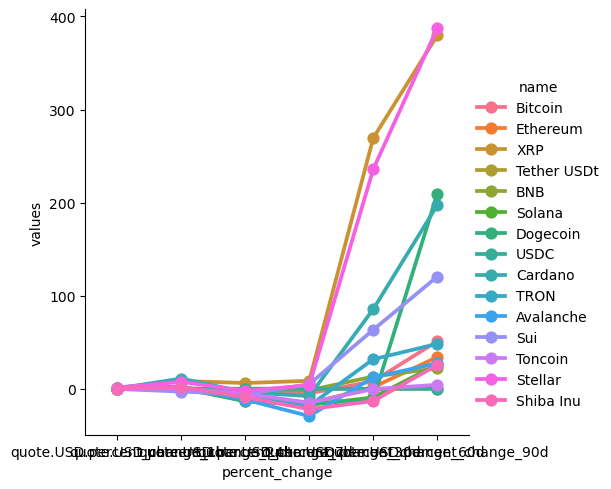

In [62]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [69]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'], ['1h'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h'], ['24h'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_7d'], ['7d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_30d'], ['30d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_60d'], ['60d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_90d'], ['90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.17309
1,Bitcoin,24h,0.25369
2,Bitcoin,7d,-3.74075
3,Bitcoin,30d,-4.92695
4,Bitcoin,60d,7.96370
5,Bitcoin,90d,51.04291
6,Ethereum,1h,0.13657
7,Ethereum,24h,1.24272
8,Ethereum,7d,-9.88547
9,Ethereum,30d,-15.76205


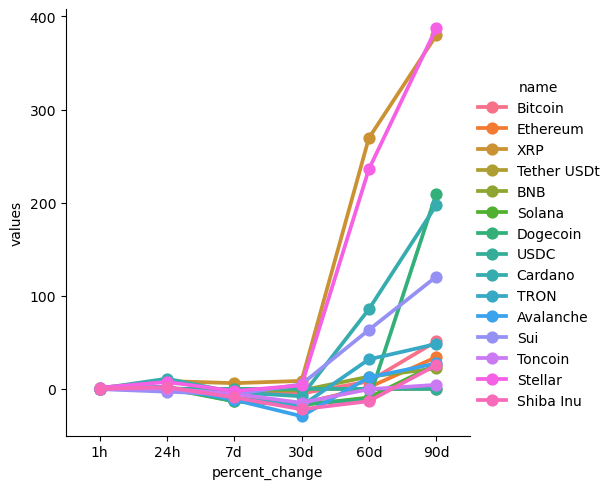

In [71]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [77]:
df9 = df[['name','quote.USD.price','timestamp']]
df10 = df9.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,94457.01504,2025-01-11 18:25:36.978461
15,Bitcoin,94462.69315,2025-01-11 18:28:51.121290
30,Bitcoin,94485.30354,2025-01-11 18:29:51.439172
45,Bitcoin,94479.57654,2025-01-11 18:30:51.805275
60,Bitcoin,94483.09906,2025-01-11 18:31:52.107772
75,Bitcoin,94483.09906,2025-01-11 18:32:52.361597
90,Bitcoin,94507.51156,2025-01-11 18:33:52.782594


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

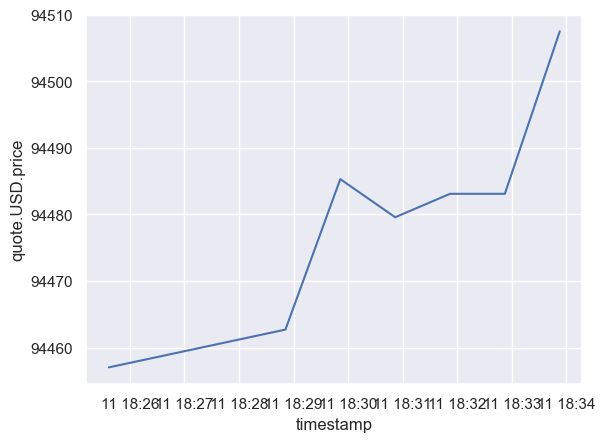

In [83]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)